<a href="https://colab.research.google.com/github/pranathi1923/Stocks-Analysis/blob/main/pranathi_mushanolla_Quant_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1dq20TV2tJpAKq0DzzZ8tlvPnqDlvXwPE'}) 
downloaded.GetContentFile('google.csv') 
downloaded = drive.CreateFile({'id':'1iKklzSycJasbLYbuHGjdJwGr7svTkmRK'}) 
downloaded.GetContentFile('microsoft.csv')

In [ ]:
#3.1 Read file as panda dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1 = pd.read_csv('google.csv') 
df2= pd.read_csv('microsoft.csv') 


In [ ]:
dates1 = df1['Date']
dates2 =df2['Date']
turnover1 =df1['Volume']
turnover2=df2['Volume']
df1['returns1']=df1['Adj Close'].pct_change(1)
df2['returns2']=df2['Adj Close'].pct_change(1)
print(df1['returns1'])
print(df2['returns2'])


0           NaN
1      0.019851
2      0.011644
3     -0.026841
4     -0.014813
         ...   
247   -0.022370
248    0.013013
249    0.004179
250   -0.001913
251   -0.014844
Name: returns1, Length: 252, dtype: float64
0           NaN
1      0.028799
2      0.013997
3     -0.011099
4     -0.007168
         ...   
247   -0.016723
248    0.019596
249    0.015593
250    0.028208
251   -0.014759
Name: returns2, Length: 252, dtype: float64


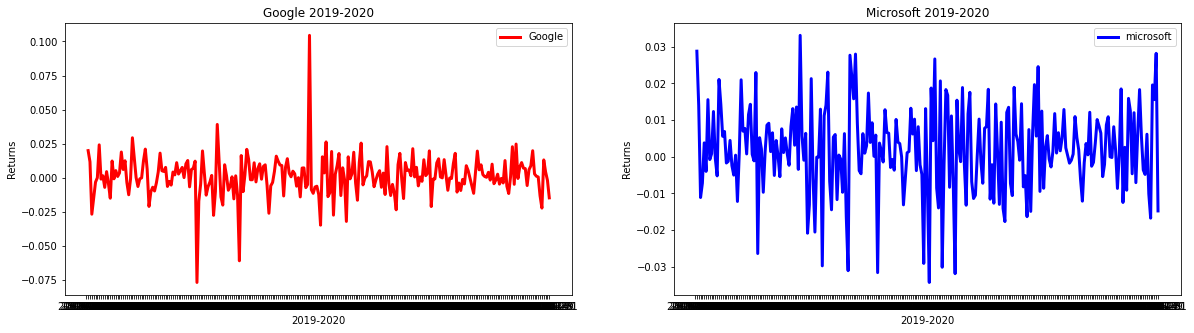

In [ ]:
fig,axes =plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes[0].plot(dates1,df1['returns1'],'r',lw=3,label='Google')
axes[1].plot(dates2,df2['returns2'],'b',lw=3,label='microsoft')
axes[0].set_xlabel('2019-2020')
axes[1].set_xlabel('2019-2020')
axes[0].set_ylabel('Returns')
axes[1].set_ylabel('Returns')
axes[0].set_title('Google 2019-2020')
axes[1].set_title('Microsoft 2019-2020')
axes[0].legend() 
axes[1].legend()

In [ ]:
mean1=np.mean(df1['returns1'])
mean2=np.mean(df2['returns2'])
print( "MEAN OF GOOGLE RETURNS:   ",mean1)
print("MEAN OF MICROSOFT RETURNS:",mean2)


MEAN OF GOOGLE RETURNS:    0.0011241764801533756
MEAN OF MICROSOFT RETURNS: 0.002139581480088299


In [ ]:
variance1=np.std(df1['returns1'])**2
variance2=np.std(df2['returns2'])**2
print("VARIANCE OF GOOGLE RETURNS:   ",variance1)
print("VARIANCE OF MICROSOFT RETURNS:",variance2)

VARIANCE OF GOOGLE RETURNS:    0.00021155787689980464
VARIANCE OF MICROSOFT RETURNS: 0.00013742333543014705


In [ ]:
from scipy.stats import skew
skew1=skew(df1['returns1'].dropna())
skew2=skew(df2['returns2'].dropna())
print("SKEWNESS OF GOOGLE RETURNS:    ",skew1)
print("SKEWNESS OF MICROSOFT RETURNS:",skew2)

SKEWNESS OF GOOGLE RETURNS:     0.4580977772390253
SKEWNESS OF MICROSOFT RETURNS: -0.3459692407373441


In [ ]:
from scipy.stats import kurtosis
kurtosis1=kurtosis(df1['returns1'].dropna())
kurtosis2=kurtosis(df2['returns2'].dropna())
print("KURTOSIS OF GOOGLE RETURNS:   ",kurtosis1)
print("KURTOSIS OF MICROSOFT RETURNS:",kurtosis2)

KURTOSIS OF GOOGLE RETURNS:    13.140502678830988
KURTOSIS OF MICROSOFT RETURNS: 0.6821289483816897


In [ ]:
correlation =np.corrcoef(df1['returns1'],df2['returns2'])
print("CORRELATION OF GOOGLE AND MICROSOFT RETURNS: ",correlation)

CORRELATION OF GOOGLE AND MICROSOFT RETURNS:  [[nan nan]
 [nan nan]]


**CORRELATION VS CAUSATION**

"nan" says there is no correlation between returns of microsoft and google.As expected there is no relation between microsoft and google.Both have the same cause instead.Their companies returns depends on their performance and their users. 

**VARIANCE AS RISK MEASURE**

Variance measures variability from the average or mean. To investors, variability is volatility, and volatility is a measure of risk. Therefore, the variance statistic can help determine the risk an investor assumes when purchasing a specific security.A large variance indicates that numbers in the set are far from the mean and from each other, while a small variance indicates the opposite.

**STOCK RETURNS ARE NOT NORMALLY DISTRUBUTED**

 all most all the stock returns have fat tails.The fat tails mean that extreme events occur more frequently in reality than what a normal distribution would predict.fat tails imply that the normal distribution might not be the best describer of stock returns.

